<a href="https://colab.research.google.com/github/ShahreenSheikh/Cryptocurrency_Predictor/blob/main/Cryptocurrency_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Load the dataset
data = pd.read_csv('/content/dataset.csv')
data

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


In [11]:
data.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [12]:
data.isnull().any().any()

False

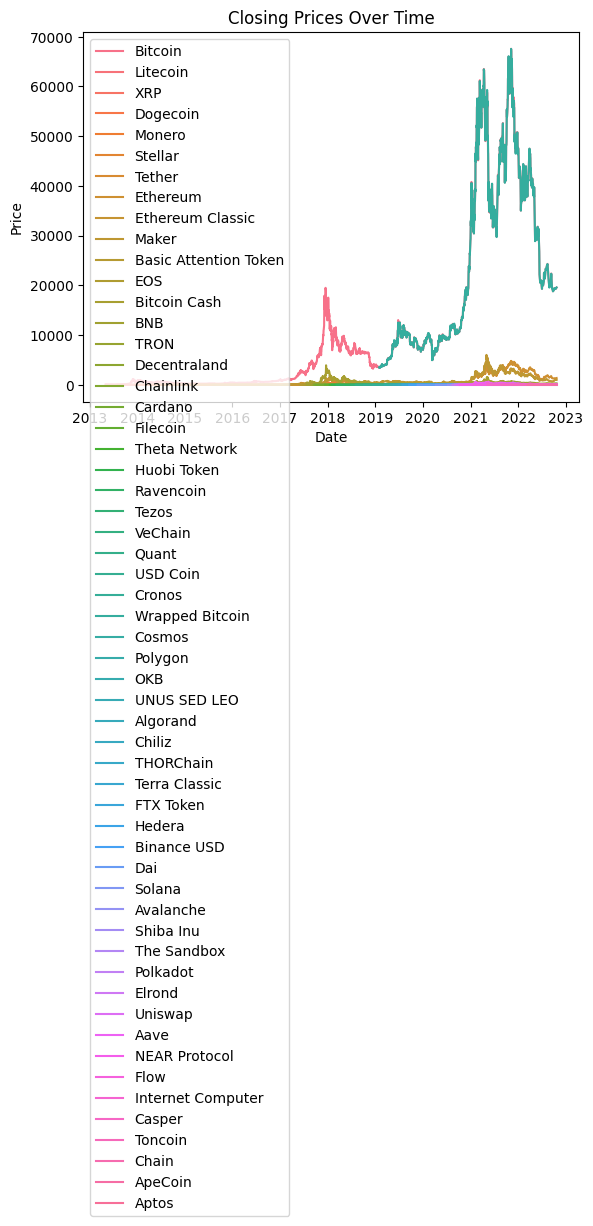

In [13]:
# Convert 'date' and 'timestamp' columns to datetime objects
data['date'] = pd.to_datetime(data['date'])
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Visualize closing prices over time
sns.lineplot(x='date', y='close', data=data, hue='crypto_name')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate the price change
data['price_change'] = data['close'].diff()

# Prepare the features (X) and target variable (y)
X = data[['close', 'volume', 'marketCap', 'price_change']].dropna()
y = data['close'].shift(-1).reindex(X.index).reset_index(drop=True)

Crypto: Aave
Mean Squared Error: 41.89971597183909
R-squared: 0.9976978535854862
Predicted Next Day Price for Aave: 92.07051860755982
---
Crypto: Algorand
Mean Squared Error: 0.0008189058502483279
R-squared: 0.9968041590120017
Predicted Next Day Price for Algorand: 0.31118058707803264
---
Crypto: ApeCoin
Mean Squared Error: 10.320547443902083
R-squared: 0.4550409318669446
Predicted Next Day Price for ApeCoin: 4.6442464496702165
---
Not enough data for Aptos. Skipping...
Crypto: Avalanche
Mean Squared Error: 1.5024221585075022
R-squared: 0.9985146206835854
Predicted Next Day Price for Avalanche: 16.607728320057763
---
Crypto: BNB
Mean Squared Error: 10.258585478916421
R-squared: 0.9996135052555366
Predicted Next Day Price for BNB: 271.65806852513435
---
Crypto: Basic Attention Token
Mean Squared Error: 0.00016622660840539052
R-squared: 0.9979298431125053
Predicted Next Day Price for Basic Attention Token: 0.2865071966451245
---
Crypto: Binance USD
Mean Squared Error: 3.6192745258560374e

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Predicted Next Day Price for Casper: 0.04650604127533675
---
Crypto: Chain
Mean Squared Error: 7.097677219878993e-06
R-squared: 0.9824739114213342
Predicted Next Day Price for Chain: 0.058004600951915605
---
Crypto: Chainlink
Mean Squared Error: 0.1341561210529883
R-squared: 0.9989366461051092
Predicted Next Day Price for Chainlink: 7.159350535603864
---
Crypto: Chiliz
Mean Squared Error: 2.9856725568479972e-05
R-squared: 0.9989888010571274
Predicted Next Day Price for Chiliz: 0.18800518793382873
---
Crypto: Cosmos
Mean Squared Error: 0.22599530920565433
R-squared: 0.9976995808106701
Predicted Next Day Price for Cosmos: 12.003570134939025
---
Crypto: Cronos
Mean Squared Error: 2.7096605099252032e-05
R-squared: 0.9980778335038868
Predicted Next Day Price for Cronos: 0.1090308024676697
---
Crypto: Dai
Mean Squared Error: 3.511763743101942e-05
R-squared: 0.4418224397852628
Predicted Next Day Price for Dai: 1.0015434532952736
---
Crypto: Decentraland
Mean Squared Error: 0.00057035003822311

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Crypto: Ethereum Classic
Mean Squared Error: 1.2339990576315696
R-squared: 0.9955804438985325
Predicted Next Day Price for Ethereum Classic: 23.5933608824945
---
Crypto: FTX Token
Mean Squared Error: 0.42639433943110994
R-squared: 0.999078784930668
Predicted Next Day Price for FTX Token: 22.962013757148647
---
Crypto: Filecoin
Mean Squared Error: 9.090138051249289
R-squared: 0.9905373095122431
Predicted Next Day Price for Filecoin: 5.32999466020941
---
Crypto: Flow
Mean Squared Error: 0.5016689499008412
R-squared: 0.9960017956897149
Predicted Next Day Price for Flow: 1.576331354091
---
Crypto: Hedera
Mean Squared Error: 3.7128402876752434e-05
R-squared: 0.9976479505065715
Predicted Next Day Price for Hedera: 0.06131097059303227
---
Crypto: Huobi Token
Mean Squared Error: 0.09637925430249557
R-squared: 0.996492641282937
Predicted Next Day Price for Huobi Token: 8.700318482956234
---
Crypto: Internet Computer
Mean Squared Error: 9.363301502993902
R-squared: 0.9961650542441407
Predicted N

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Crypto: Polkadot
Mean Squared Error: 0.44165335217587004
R-squared: 0.9973949819436487
Predicted Next Day Price for Polkadot: 6.309157380815931
---
Crypto: Polygon
Mean Squared Error: 0.0004583804327991841
R-squared: 0.998944516232311
Predicted Next Day Price for Polygon: 0.9055455361248574
---
Crypto: Quant
Mean Squared Error: 0.08736649342419368
R-squared: 0.9999851400576806
Predicted Next Day Price for Quant: 175.46815048228387
---
Crypto: Ravencoin
Mean Squared Error: 4.626975070924869e-06
R-squared: 0.9976455738960416
Predicted Next Day Price for Ravencoin: 0.03185945039198954
---
Crypto: Shiba Inu
Mean Squared Error: 7.0425603680447104e-12
R-squared: 0.9542147076491674
Predicted Next Day Price for Shiba Inu: 8.827772766977394e-06
---
Crypto: Solana
Mean Squared Error: 2.0310287034242243
R-squared: 0.9994606844429645
Predicted Next Day Price for Solana: 30.607944848543355
---
Crypto: Stellar
Mean Squared Error: 3.465304507693103e-05
R-squared: 0.9981801496711166
Predicted Next Day

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

Crypto: Tezos
Mean Squared Error: 0.006880296709920436
R-squared: 0.9975209230719569
Predicted Next Day Price for Tezos: 1.3975676092268392
---
Crypto: The Sandbox
Mean Squared Error: 0.011394108321106924
R-squared: 0.9955941529677436
Predicted Next Day Price for The Sandbox: 0.7858061776832552
---
Crypto: Theta Network
Mean Squared Error: 0.0004164965537609099
R-squared: 0.9999580237437223
Predicted Next Day Price for Theta Network: 1.0423603736369955
---
Crypto: Toncoin
Mean Squared Error: 0.0031106882165284227
R-squared: 0.9969310315620703
Predicted Next Day Price for Toncoin: 1.396048425833946
---
Crypto: UNUS SED LEO
Mean Squared Error: 0.0023255647505562673
R-squared: 0.9988699089975154
Predicted Next Day Price for UNUS SED LEO: 4.138028448173644
---
Crypto: USD Coin
Mean Squared Error: 1.2403723839752004e-05
R-squared: 0.6927403257136486
Predicted Next Day Price for USD Coin: 1.000178349022061
---
Crypto: Uniswap
Mean Squared Error: 0.32187942090672983
R-squared: 0.9968658905355

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

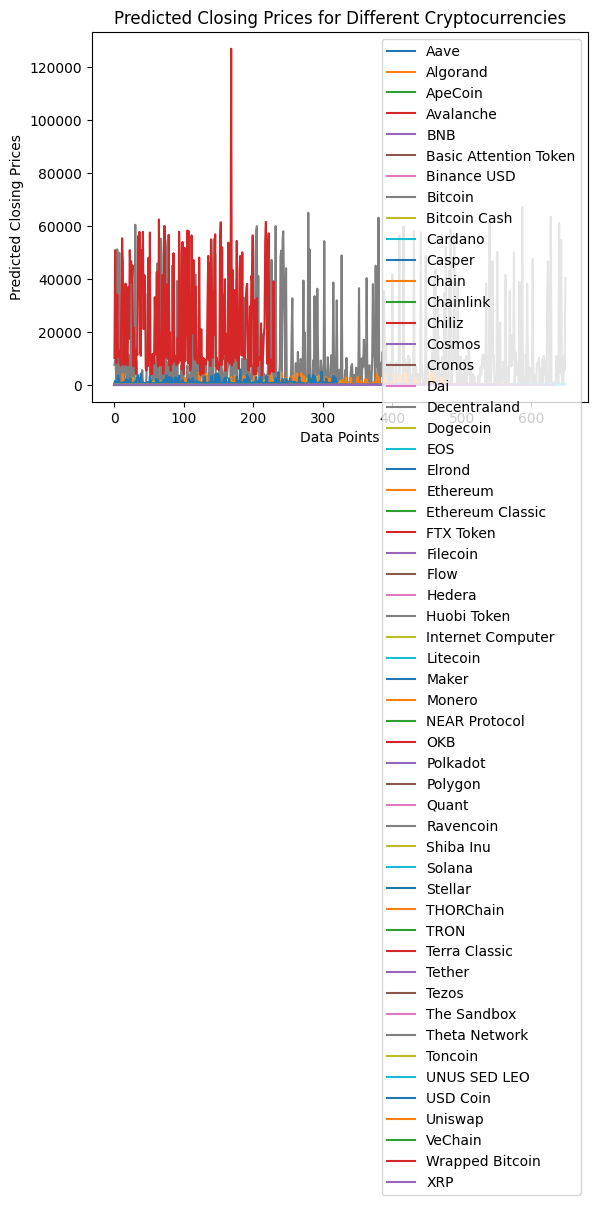

In [14]:
# Iterate over each cryptocurrency
grouped_data = data.groupby('crypto_name')
for crypto, crypto_group in grouped_data:
    # Select features and target variable
    features = ['open', 'high', 'low', 'volume', 'marketCap']
    X = crypto_group[features]
    y = crypto_group['close']

    # Check if there is enough data for training and testing
    if len(X) <= 1:
        print(f"Not enough data for {crypto}. Skipping...")
        continue

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Crypto: {crypto}')
    print('Mean Squared Error:', mse)
    print('R-squared:', r2)

    # Predict the closing price for the next day
    next_day_features = X.iloc[-1, :].values.reshape(1, -1)
    next_day_price = model.predict(next_day_features)[0]

    print(f'Predicted Next Day Price for {crypto}: {next_day_price}')
    print('---')
    # Plot the predicted closing prices
    plt.plot(y_pred, label=crypto)

# Set labels and title
plt.xlabel('Data Points')
plt.ylabel('Predicted Closing Prices')
plt.title('Predicted Closing Prices for Different Cryptocurrencies')
plt.legend()
plt.show()